1.Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

2.If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

3.Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

4.Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

5.Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

6.If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?


In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [3]:
#Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

In [4]:
useducation.head(20)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [5]:
print(useducation['TOTAL_REVENUE'])

0        2678885.0
1        1049591.0
2        3258079.0
3        1711959.0
4       26260025.0
5        3185173.0
6        3834302.0
7         645233.0
8         709480.0
9       11506299.0
10       5536901.0
11        996809.0
12        859329.0
13       9748650.0
14       5060274.0
15       2663934.0
16       2245348.0
17       2642902.0
18       3341253.0
19       1206819.0
20       4658498.0
21       5517659.0
22       9963137.0
23       4684684.0
24       1684706.0
25       4043682.0
26        828983.0
27       1542413.0
28       1097076.0
29       1063391.0
           ...    
1462           NaN
1463           NaN
1464           NaN
1465           NaN
1466           NaN
1467           NaN
1468           NaN
1469           NaN
1470           NaN
1471           NaN
1472           NaN
1473           NaN
1474           NaN
1475           NaN
1476           NaN
1477           NaN
1478           NaN
1479           NaN
1480           NaN
1481           NaN
1482           NaN
1483        

In [6]:
useducation['TOTAL_REVENUE'] = useducation['TOTAL_REVENUE'].interpolate(method='linear',limit_direction='forward')

In [7]:
useducation['TOTAL_REVENUE']

0        2678885.0
1        1049591.0
2        3258079.0
3        1711959.0
4       26260025.0
5        3185173.0
6        3834302.0
7         645233.0
8         709480.0
9       11506299.0
10       5536901.0
11        996809.0
12        859329.0
13       9748650.0
14       5060274.0
15       2663934.0
16       2245348.0
17       2642902.0
18       3341253.0
19       1206819.0
20       4658498.0
21       5517659.0
22       9963137.0
23       4684684.0
24       1684706.0
25       4043682.0
26        828983.0
27       1542413.0
28       1097076.0
29       1063391.0
           ...    
1462    23766529.0
1463    23766529.0
1464    23766529.0
1465    23766529.0
1466    23766529.0
1467    23766529.0
1468    23766529.0
1469    23766529.0
1470    23766529.0
1471    23766529.0
1472    23766529.0
1473    23766529.0
1474    23766529.0
1475    23766529.0
1476    23766529.0
1477    23766529.0
1478    23766529.0
1479    23766529.0
1480    23766529.0
1481    23766529.0
1482    23766529.0
1483    2376

In [8]:
useducation['TOTAL_REVENUE'].isnull().count()#???

1492

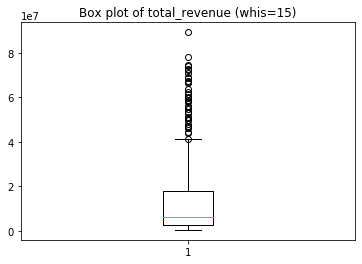

In [9]:
plt.boxplot(useducation["TOTAL_REVENUE"])
plt.title("Box plot of total_revenue (whis=15)")
plt.show()

From the boxplot it's clear to see there are outliers, then using Tukey method to find how many outliers

In [10]:
q75, q25 = np.percentile(useducation["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    minval = q25 - (iqr*threshold)
    maxval = q75 + (iqr*threshold)
    print('when threshold is: {}'.format(threshold))
    print('N of outliers is: {}'.format(len((np.where((useducation["TOTAL_REVENUE"] > maxval) | (useducation["TOTAL_REVENUE"] < minval))[0]))))


when threshold is: 1.0
N of outliers is: 50
when threshold is: 1.5
N of outliers is: 40
when threshold is: 2.0
N of outliers is: 33
when threshold is: 2.5
N of outliers is: 21
when threshold is: 3.0
N of outliers is: 12
when threshold is: 3.5
N of outliers is: 6
when threshold is: 4.0
N of outliers is: 1
when threshold is: 4.5
N of outliers is: 1


In [11]:
# same method for column TOTAL_EXPENDITURE

In [12]:
useducation['TOTAL_EXPENDITURE'].isnull().sum()*100/useducation['TOTAL_EXPENDITURE'].isnull().count()

14.20911528150134

In [13]:
useducation=useducation.dropna(subset=['TOTAL_EXPENDITURE'])

In [14]:
useducation['TOTAL_EXPENDITURE'].isnull().sum()*100/useducation['TOTAL_EXPENDITURE'].isnull().count()

0.0

In [15]:
useducation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 0 to 1285
Data columns (total 25 columns):
PRIMARY_KEY                     1280 non-null object
STATE                           1280 non-null object
YEAR                            1280 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1218 non-null float64
GRADES_KG_G                     1229 non-null float64
GRADES_4_G                      1229 non-null float64
GRADES_8_G                      1

In [16]:
useducation['TOTAL_EXPENDITURE'] = pd.to_numeric(useducation['TOTAL_EXPENDITURE'], downcast='float')

{'whiskers': [<matplotlib.lines.Line2D at 0x2751f51f198>,
 'caps': [<matplotlib.lines.Line2D at 0x2751f4eef98>,
 'boxes': [<matplotlib.lines.Line2D at 0x2751f51f860>],
 'medians': [<matplotlib.lines.Line2D at 0x2751f5d1160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2751f5d1400>],
 'means': []}

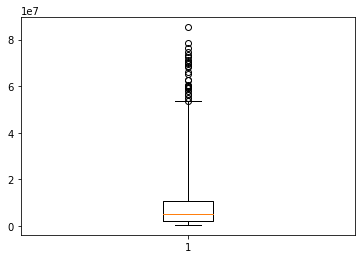

In [17]:
plt.boxplot(useducation["TOTAL_EXPENDITURE"],whis=5)# question?? why I need to set whis=5?? sample solution set to 5,default 1.5
#plt.title("Box plot of TOTAL_EXPENDITURE (whis=1.5)")
#plt.show()

In [18]:
# You can see from the boxplot above, there are a lot of outliers showing. So I'm going to do counting on number of outliers here

In [19]:
q75, q25 = np.percentile(useducation["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    minval = q25 - (iqr*threshold)
    maxval = q75 + (iqr*threshold)
    print('when threshold is: {}'.format(threshold))
    print('N of outliers is: {}'.format(len((np.where((useducation["TOTAL_EXPENDITURE"] > maxval) | (useducation["TOTAL_EXPENDITURE"] < minval))[0]))))

    
# what's the [0] did at the end of the code?

when threshold is: 1.0
N of outliers is: 152
when threshold is: 1.5
N of outliers is: 111
when threshold is: 2.0
N of outliers is: 80
when threshold is: 2.5
N of outliers is: 55
when threshold is: 3.0
N of outliers is: 49
when threshold is: 3.5
N of outliers is: 43
when threshold is: 4.0
N of outliers is: 39
when threshold is: 4.5
N of outliers is: 35


In [20]:
# 2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned 
# in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [21]:
from scipy.stats.mstats import winsorize

winsorized_expenditure = winsorize(useducation["TOTAL_EXPENDITURE"], (0, 0.05))

winsorized_expenditure

masked_array(data=[ 2653798.,   972488.,  3401580., ..., 14207389.,
                    1963630., 23352516.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [22]:
from scipy.stats.mstats import winsorize

winsorized_expenditure = winsorize(useducation["TOTAL_EXPENDITURE"], (0, 0.10))

winsorized_expenditure

masked_array(data=[ 2653798.,   972488.,  3401580., ..., 14207389.,
                    1963630., 21896220.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

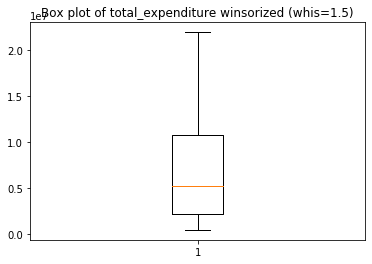

In [23]:
plt.boxplot(winsorized_expenditure)
plt.title("Box plot of total_expenditure winsorized (whis=1.5)")
plt.show()

In [24]:
winsorized_revenue = winsorize(useducation["TOTAL_REVENUE"], (0, 0.10))

winsorized_revenue

masked_array(data=[ 2678885.,  1049591.,  3258079., ..., 13448045.,
                    1788749., 21623923.],
             mask=False,
       fill_value=1e+20)

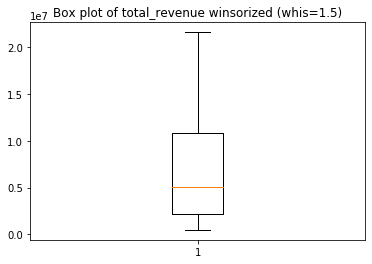

In [25]:
plt.boxplot(winsorized_revenue)
plt.title("Box plot of total_revenue winsorized (whis=1.5)")
plt.show()

In [26]:
#3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the 
# outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new 
# variable? If so, eliminate them using the technique you think most suitable.

In [27]:
useducation['deficit_revised'] = useducation['TOTAL_REVENUE'] - useducation['TOTAL_EXPENDITURE']
useducation['deficit_revised']

0         25087.0
1         77103.0
2       -143501.0
3        -31063.0
4       -878807.0
5        -79653.0
6        112964.0
7          6449.0
8        -33413.0
9        200657.0
10          959.0
11       -43312.0
12       -26832.0
13      -101910.0
14      -122480.0
15      -131840.0
16        10433.0
17       124820.0
18       -21600.0
19       -22050.0
20       -39876.0
21       272099.0
22      -207551.0
23      -296441.0
24        -7284.0
25      -153918.0
26        47974.0
27         8367.0
28      -154575.0
29        -3256.0
          ...    
1256     593242.0
1257       1625.0
1258       7156.0
1259     180482.0
1260     245065.0
1261     297425.0
1262     165510.0
1263    -128286.0
1264    1196874.0
1265     -52935.0
1266     -65273.0
1267     -40353.0
1268     148476.0
1269     139288.0
1270     417130.0
1271     446824.0
1272    1414617.0
1273    -662811.0
1274     124043.0
1275     173349.0
1276     -78880.0
1277    -241611.0
1278     108637.0
1279      25695.0
1280     3

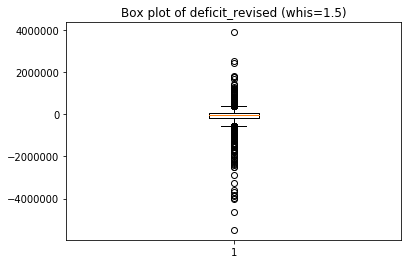

In [28]:
# to check if there is outliers in the new column
plt.boxplot(useducation['deficit_revised'])
plt.title("Box plot of deficit_revised (whis=1.5)")
plt.show()



# this is sample solution, what is whis=5 mean, different from default?
#plt.figure(figsize = (15,5))

#plt.subplot(1,2,1)
#plt.boxplot(education_df["TOTAL_REVENUE"], whis = 5)
#plt.title("Box plot of total revenue")

#plt.subplot(1,2,2)
#plt.boxplot(education_df["TOTAL_EXPENDITURE"], whis = 5)
#plt.title("Box plot of total expenditure")
#plt.show()


In [29]:
# to remove the outliers of deficit_revised
useducation['winsorized_deficitrevised'] = winsorize(useducation['deficit_revised'], (0.10, 0.10))

useducation['winsorized_deficitrevised']


0        25087.0
1        77103.0
2      -143501.0
3       -31063.0
4      -487915.0
5       -79653.0
6       112964.0
7         6449.0
8       -33413.0
9       200657.0
10         959.0
11      -43312.0
12      -26832.0
13     -101910.0
14     -122480.0
15     -131840.0
16       10433.0
17      124820.0
18      -21600.0
19      -22050.0
20      -39876.0
21      249996.0
22     -207551.0
23     -296441.0
24       -7284.0
25     -153918.0
26       47974.0
27        8367.0
28     -154575.0
29       -3256.0
          ...   
1256    249996.0
1257      1625.0
1258      7156.0
1259    180482.0
1260    245065.0
1261    249996.0
1262    165510.0
1263   -128286.0
1264    249996.0
1265    -52935.0
1266    -65273.0
1267    -40353.0
1268    148476.0
1269    139288.0
1270    249996.0
1271    249996.0
1272    249996.0
1273   -487915.0
1274    124043.0
1275    173349.0
1276    -78880.0
1277   -241611.0
1278    108637.0
1279     25695.0
1280    249996.0
1281     35672.0
1282   -487915.0
1283   -487915

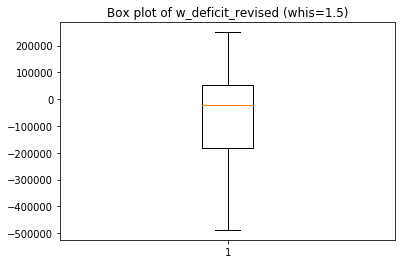

In [30]:
plt.boxplot(useducation['winsorized_deficitrevised'])
plt.title("Box plot of w_deficit_revised (whis=1.5)")
plt.show()

In [31]:
# using untouched version of data to calculate deficit

In [32]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [33]:
useducation['deficit_original']=useducation['TOTAL_REVENUE'] - useducation['TOTAL_EXPENDITURE']
useducation['deficit_original']

0        25087.0
1        77103.0
2      -143501.0
3       -31063.0
4      -878807.0
5       -79653.0
6       112964.0
7         6449.0
8       -33413.0
9       200657.0
10         959.0
11      -43312.0
12      -26832.0
13     -101910.0
14     -122480.0
15     -131840.0
16       10433.0
17      124820.0
18      -21600.0
19      -22050.0
20      -39876.0
21      272099.0
22     -207551.0
23     -296441.0
24       -7284.0
25     -153918.0
26       47974.0
27        8367.0
28     -154575.0
29       -3256.0
          ...   
1462         NaN
1463         NaN
1464         NaN
1465         NaN
1466         NaN
1467         NaN
1468         NaN
1469         NaN
1470         NaN
1471         NaN
1472         NaN
1473         NaN
1474         NaN
1475         NaN
1476         NaN
1477         NaN
1478         NaN
1479         NaN
1480         NaN
1481         NaN
1482         NaN
1483         NaN
1484         NaN
1485         NaN
1486         NaN
1487         NaN
1488         NaN
1489         N

In [34]:
# get rid of all the NaN value
useducation['deficit_original']=useducation['deficit_original'].dropna()

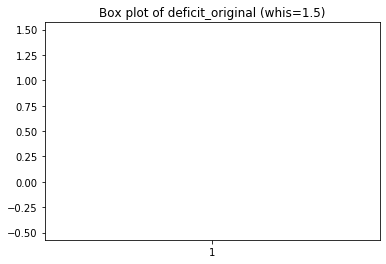

In [35]:
plt.boxplot(useducation['deficit_original'])
plt.title("Box plot of deficit_original (whis=1.5)")
plt.show()

In [36]:
# remove the outliers of deficit_original
useducation['winsorized_deficitoriginal']= winsorize(useducation['deficit_original'], (0.10, 0.10))

useducation['winsorized_deficitoriginal']

0        25087.0
1        77103.0
2      -143501.0
3       -31063.0
4      -395270.0
5       -79653.0
6       112964.0
7         6449.0
8       -33413.0
9       200657.0
10         959.0
11      -43312.0
12      -26832.0
13     -101910.0
14     -122480.0
15     -131840.0
16       10433.0
17      124820.0
18      -21600.0
19      -22050.0
20      -39876.0
21      272099.0
22     -207551.0
23     -296441.0
24       -7284.0
25     -153918.0
26       47974.0
27        8367.0
28     -154575.0
29       -3256.0
          ...   
1462         NaN
1463         NaN
1464         NaN
1465         NaN
1466         NaN
1467         NaN
1468         NaN
1469         NaN
1470         NaN
1471         NaN
1472         NaN
1473         NaN
1474         NaN
1475         NaN
1476         NaN
1477         NaN
1478         NaN
1479         NaN
1480         NaN
1481         NaN
1482         NaN
1483         NaN
1484         NaN
1485         NaN
1486         NaN
1487         NaN
1488         NaN
1489         N

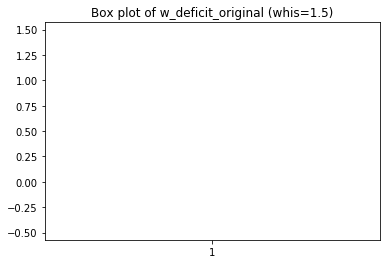

In [37]:
plt.boxplot(useducation['winsorized_deficitoriginal'])
plt.title("Box plot of w_deficit_original (whis=1.5)")
plt.show()

In [38]:
#5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. 
# Do you see any differences?

In [39]:
#winsorized_deficitrevised.describe()
type(useducation['winsorized_deficitoriginal'])

pandas.core.series.Series

In [44]:
#useducation.DataFrame({"original_budget": useducation['deficit_original'], "winsorized_deficitoriginal": useducation['winsorized_deficitoriginal'],"winsorized_deficitrevised": useducation['winsorized_deficitrevised']}).describe()
compare_list= ({useducation['deficit_original'], useducation['winsorized_deficitoriginal'], useducation['winsorized_deficitrevised']})
compare_list.describe()
useducation['deficit_original'].describe()

KeyError: 'winsorized_deficitrevised'